In [1]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
import os

In [2]:
path = Path(os.getcwd())
root_dir = path.parent.parent.absolute()

In [3]:
df = pd.read_csv(os.path.join(root_dir, "example_dataset.csv"), index_col=0)

In [2]:
df = pd.read_csv("/home/ran/datasets/atari-mem/Pong-v5/20250315_215738/data.csv", index_col=0)

In [3]:
df.head()

,game_name,state_dim,action_dim,agent_hidden_model_size,episode_reward,episode_length,exploration_rate,gpu_before_train,gpu_after_train,cpu_usage
0,ALE/Pong-v5,"(4, 84, 84)",6,2.585167,-21.0,0.960720,1.000000,0,0,4315.054080
1,ALE/Pong-v5,"(4, 84, 84)",6,2.585167,-21.0,0.904056,0.431257,0,0,4310.413312
2,ALE/Pong-v5,"(4, 84, 84)",6,2.585167,-19.0,1.102917,0.221924,0,0,4342.099968
3,ALE/Pong-v5,"(4, 84, 84)",6,2.585167,-20.0,0.993516,0.144876,0,0,4350.341120
4,ALE/Pong-v5,"(4, 84, 84)",6,2.585167,-20.0,0.955415,0.116517,0,0,4374.949888


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1101 entries, 0 to 1100
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   game_name                1101 non-null   object 
 1   state_dim                1101 non-null   object 
 2   action_dim               1101 non-null   int64  
 3   agent_hidden_model_size  1101 non-null   float64
 4   episode_reward           1101 non-null   float64
 5   episode_length           1101 non-null   float64
 6   exploration_rate         1101 non-null   float64
 7   gpu_before_train         1101 non-null   int64  
 8   gpu_after_train          1101 non-null   int64  
 9   cpu_usage                1101 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 94.6+ KB


In [16]:
# Step 3: Compute a rolling average of episode rewards to assess training stability.
rolling_window = 10  # You can adjust the window size as needed.
df['rolling_reward'] = df['episode_reward'].rolling(window=rolling_window, min_periods=1).mean()

# Helper Functions

In [17]:
# ------------------------------
# Helper Functions
# ------------------------------
def setup_chart(title, xlabel, ylabel, figsize=(10, 5)):
    """Sets up a basic chart with common formatting."""
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

def plot_line(x, y, label=None, alpha=1.0, linewidth=1, color=None):
    """Plots a line chart."""
    plt.plot(x, y, label=label, alpha=alpha, linewidth=linewidth, color=color)

def plot_area(x, y, label=None, alpha=0.5, color=None):
    """Plots an area chart."""
    plt.fill_between(x, y, label=label, alpha=alpha, color=color)

def finalize_chart(show_legend=True):
    """Finalizes the chart with legend and display."""
    if show_legend:
        plt.legend()
    plt.show()

def convert_to_mb(series, conversion_factor=1024*1024):
    """Converts a pandas Series from bytes to MB if necessary."""
    # If values seem high (e.g., > 1e6), assume they're in bytes and convert.
    if series.max() > 1e6:
        return series / conversion_factor
    return series

In [18]:
df['rolling_reward'] = df['rolling_reward'].round(2)
df['episode_reward'] = df['episode_reward'].round(2)

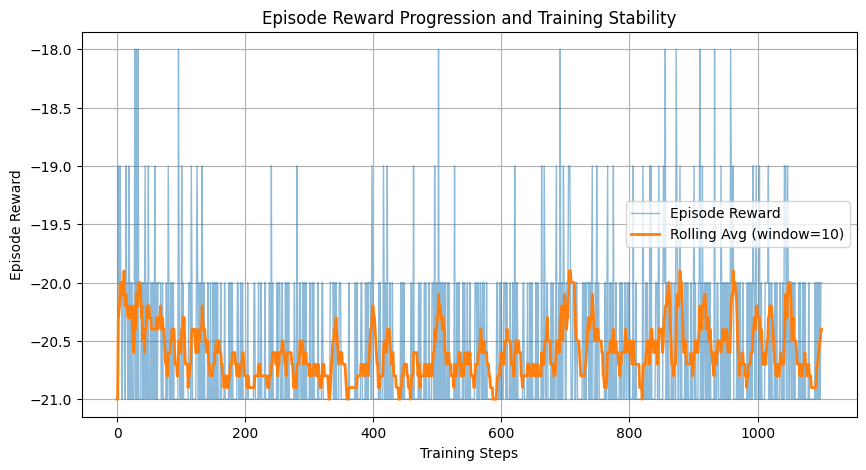

In [19]:
# ------------------------------
# Plot 1: Episode Rewards vs. Training Steps (Line Chart)
# ------------------------------
setup_chart("Episode Reward Progression and Training Stability", "Training Steps", "Episode Reward")
plot_line(df.index, df['episode_reward'], label="Episode Reward", alpha=0.5)
plot_line(df.index, df['rolling_reward'], label=f"Rolling Avg (window={rolling_window})", linewidth=2)
finalize_chart()

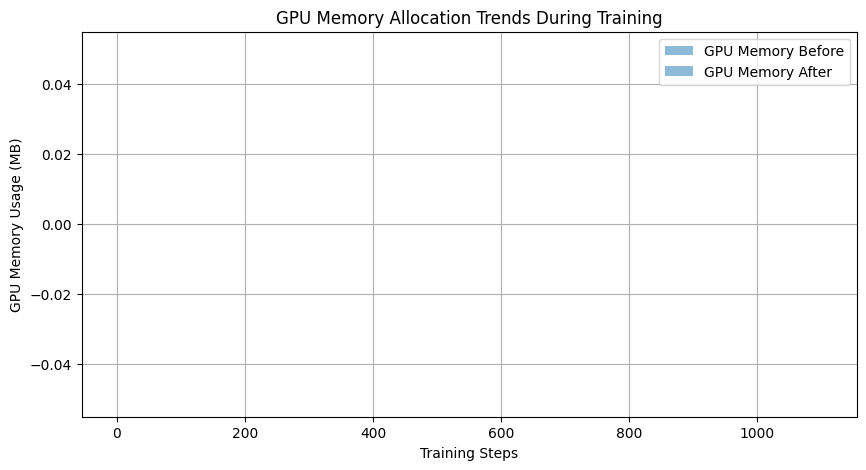

In [20]:
# ------------------------------
# Plot 2: GPU Memory Usage Trend (Area Chart)
# ------------------------------
setup_chart("GPU Memory Allocation Trends During Training", "Training Steps", "GPU Memory Usage (MB)")
plot_area(df.index, df['gpu_before_train'], label="GPU Memory Before")
plot_area(df.index, df['gpu_after_train'], label="GPU Memory After")
finalize_chart()

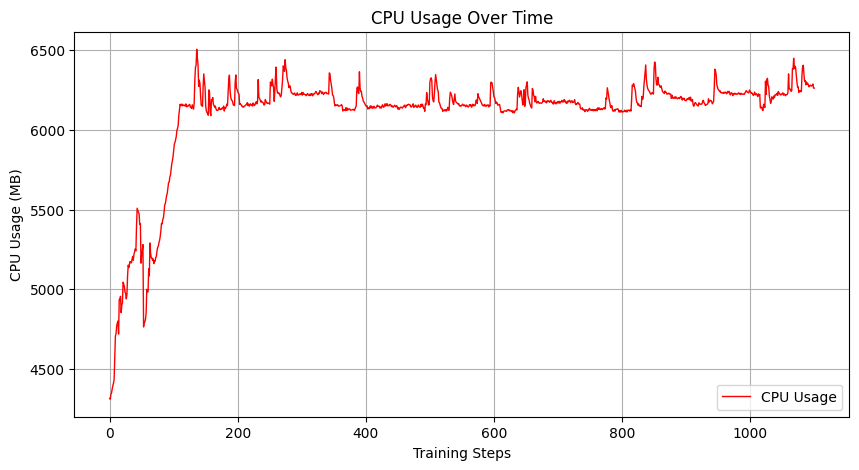

In [21]:
# ------------------------------
# Plot 3: CPU Usage Over Time (Line Chart)
# ------------------------------
setup_chart("CPU Usage Over Time", "Training Steps", "CPU Usage (MB)")
plot_line(df.index, df['cpu_usage'], label="CPU Usage", color="red")
finalize_chart()

## 1. Episode Rewared Over time

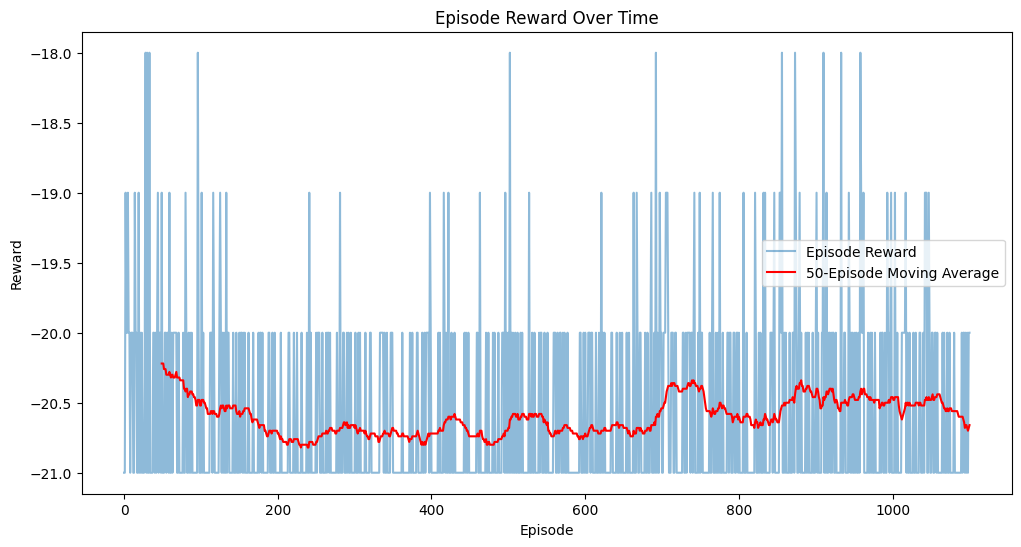

In [22]:
# Assume your data is in a DataFrame called df and that each row represents an episode.
fig = plt.figure(figsize=(12, 6))
plt.plot(df.index, df['episode_reward'], label='Episode Reward', alpha=0.5)
plt.plot(df['episode_reward'].rolling(window=50).mean(), label='50-Episode Moving Average', color='red')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode Reward Over Time')
plt.legend()
plt.show()
fig.savefig("episode_reward.png")

## 2. Episode Length vs. Episode Reward

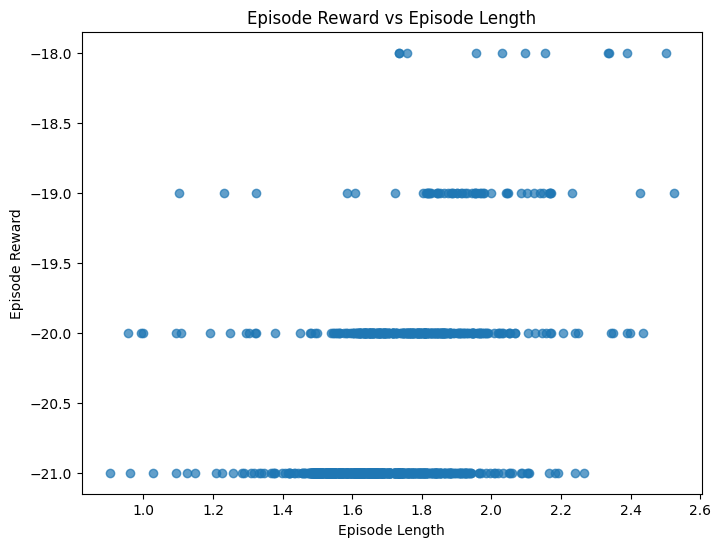

In [23]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(df['episode_length'], df['episode_reward'], alpha=0.7)
plt.xlabel('Episode Length')
plt.ylabel('Episode Reward')
plt.title('Episode Reward vs Episode Length')
plt.show()
fig.savefig("episode_reward_vs_episode_length.png")

## 3. Exploration Rate Analysis

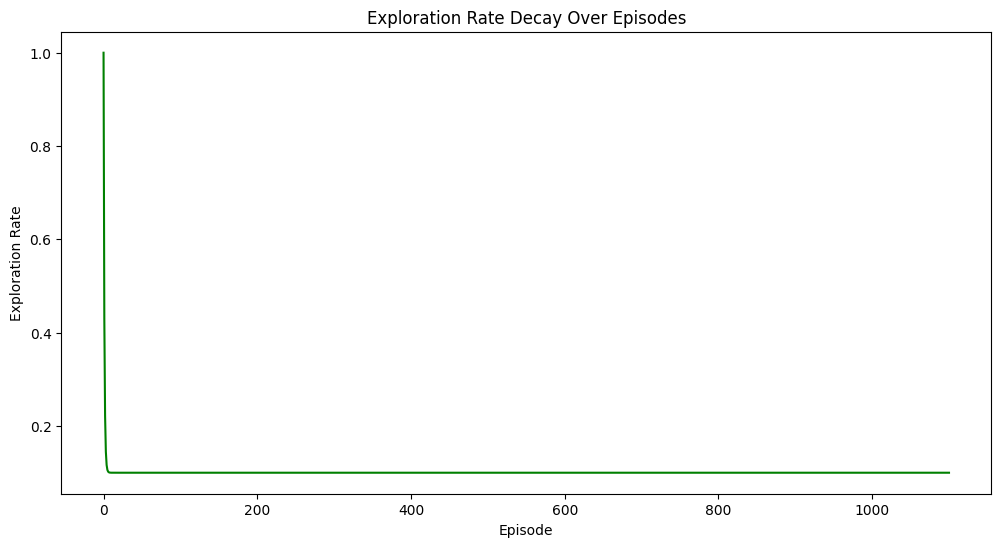

In [24]:
fig = plt.figure(figsize=(12, 6))
plt.plot(df.index, df['exploration_rate'], color='green')
plt.xlabel('Episode')
plt.ylabel('Exploration Rate')
plt.title('Exploration Rate Decay Over Episodes')
plt.show()
fig.savefig("exploration_rate.png")

## 4. GPU Usage Before and After Training

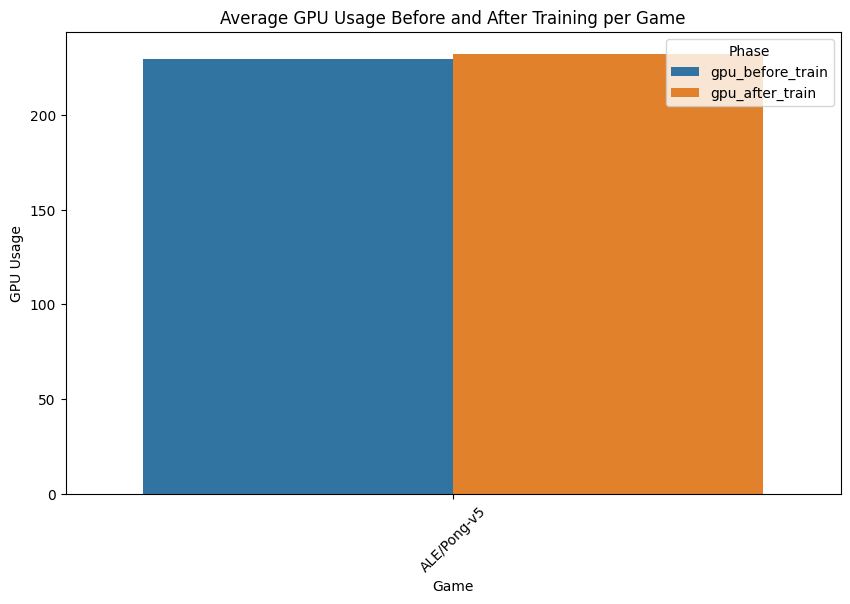

In [13]:
# Group by game_name and compute the mean GPU usage before and after training.
gpu_usage = df.groupby('game_name')[['gpu_before_train', 'gpu_after_train']].mean().reset_index()

# Melt the DataFrame for easier plotting with Seaborn.
gpu_usage_melted = gpu_usage.melt(id_vars='game_name', var_name='Phase', value_name='GPU Usage')

fig = plt.figure(figsize=(10, 6))
sns.barplot(x='game_name', y='GPU Usage', hue='Phase', data=gpu_usage_melted)
plt.title('Average GPU Usage Before and After Training per Game')
plt.xlabel('Game')
plt.ylabel('GPU Usage')
plt.xticks(rotation=45)
plt.show()
fig.savefig("gpu_usage.png")

## 5. CPU Usage Over Episodes

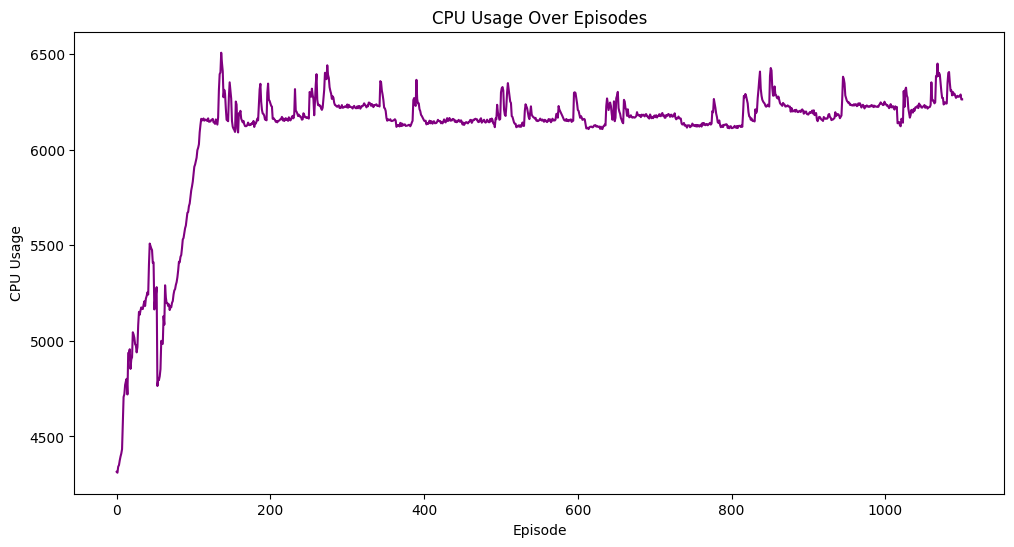

In [25]:
fig = plt.figure(figsize=(12, 6))
plt.plot(df.index, df['cpu_usage'], color='purple')
plt.xlabel('Episode')
plt.ylabel('CPU Usage')
plt.title('CPU Usage Over Episodes')
plt.show()
fig.savefig("cpu_usage.png")

## 6. Correlation Analysis

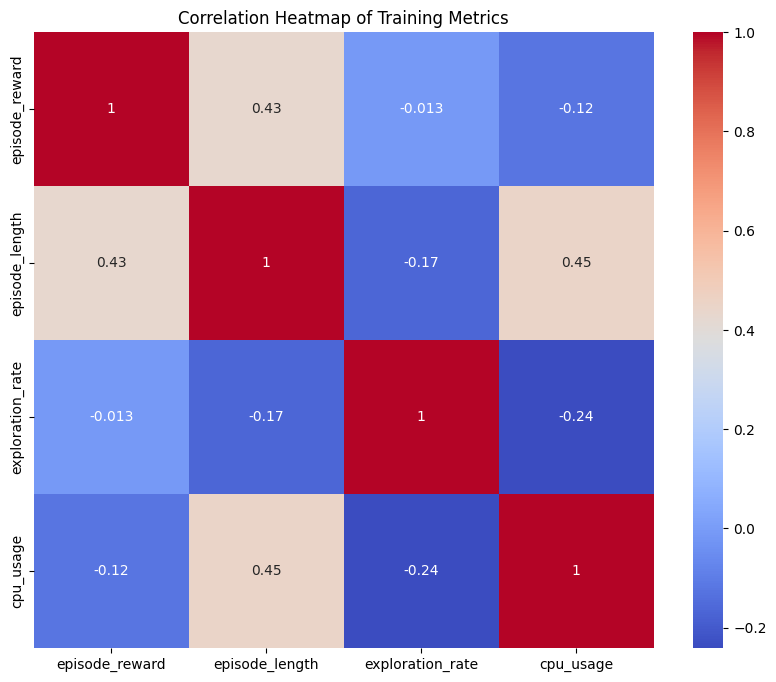

In [26]:
fig = plt.figure(figsize=(10, 8))
# Select the columns of interest.
metrics = df[['episode_reward', 'episode_length', 'exploration_rate', 'cpu_usage']]
corr_matrix = metrics.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Training Metrics')
plt.show()
fig.savefig("correlation_heatmap.png")

## 7. Hyperparameter Summary

In [15]:
# Create a summary table grouped by game_name.
hyperparams = df.groupby('game_name')[['state_dim', 'action_dim', 'agent_hidden_model_size']].first()
print(hyperparams)

                 state_dim  action_dim  agent_hidden_model_size
game_name                                                      
ALE/Pong-v5  (210, 160, 3)           6                44.303368


## 8. Benchmark Memory Consumption

/tmp/ipykernel_30914/969250980.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='game_name', y='gpu_memory_used', data=memory_usage, palette='viridis')


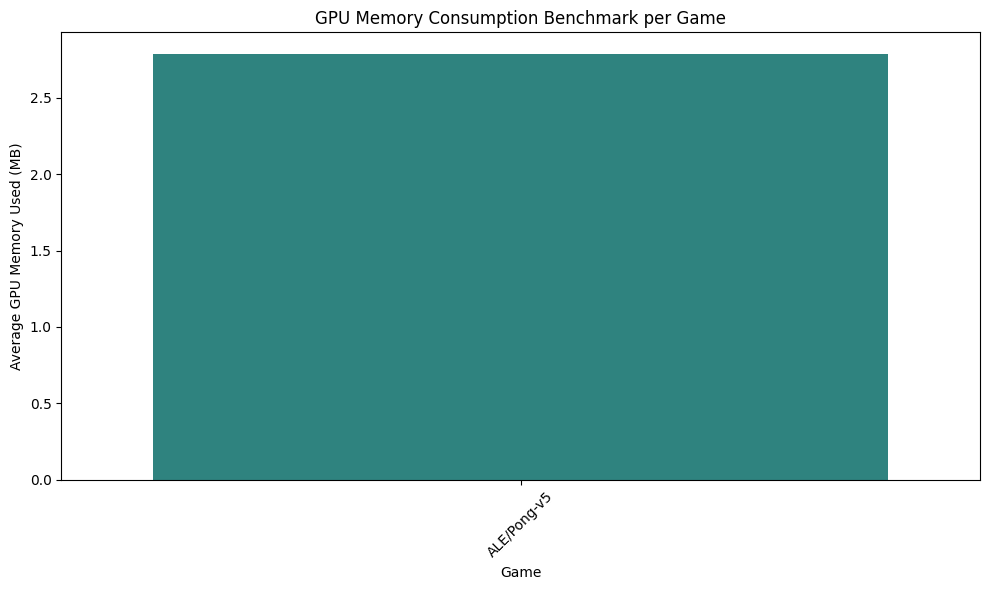

In [16]:
# Compute the difference in GPU memory consumption
df['gpu_memory_used'] = df['gpu_after_train'] - df['gpu_before_train']

# Group by game and compute the average memory consumption
memory_usage = df.groupby('game_name')['gpu_memory_used'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='game_name', y='gpu_memory_used', data=memory_usage, palette='viridis')
plt.xlabel('Game')
plt.ylabel('Average GPU Memory Used (MB)')
plt.title('GPU Memory Consumption Benchmark per Game')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()